# Análise de Overfit no XGBoost

## Projeto de Mapeamento Marinho Apresentado Nas Jornadas de Engenharia Hidrográfica

## Diogo Ceddia Porto Silva

#### Importação de bibliotecas

In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt    
plt.style.use('ggplot')

#### Carregando dado

In [2]:
dado_linhas = pd.read_csv("C:\DCPS\GitHub\Dados_MapeamentoIA_JEH\dado_linhas.txt")

#### Separando target/feature e treino/validação

In [3]:
features = ['z','bs','sl','as','dist_lc','dist_ds']
target = ['classe']

X = dado_linhas[features]
y = dado_linhas[target]

X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X,columns=features)

train_size=0.9
test_size=0.1
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0,
                                                        train_size=train_size, 
                                                        test_size=test_size, 
                                                        stratify=y.classe)

#### Aplicando modelo

In [4]:
model = XGBClassifier(objective = 'multi:softmax',
                      use_label_encoder=False,
                      num_class=2,)
eval_set = [(X_train, y_train), (X_valid, y_valid)]
model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_class=2, num_parallel_tree=1,
              objective='multi:softmax', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [5]:
# make predictions for test data
y_pred = model.predict(X_valid)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = metrics.balanced_accuracy_score(y_valid, predictions)
print("Balanced Accuracy: %.3f%%" % (accuracy * 100.0))

Balanced Accuracy: 99.591%


#### Plotando análise de overfit

In [6]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

Text(0.5, 1.0, 'XGBoost Classification Error')

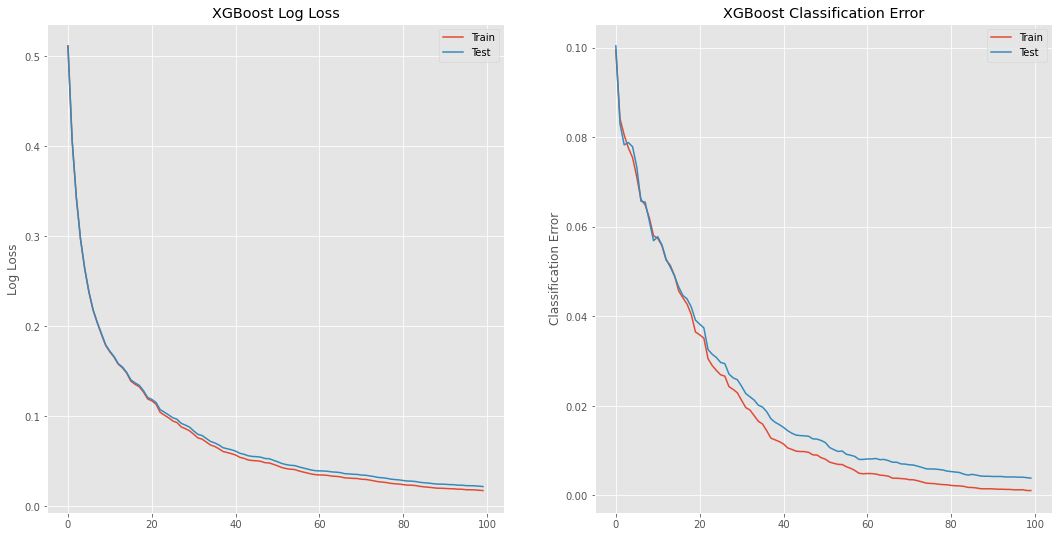

In [7]:
fig, [ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(18,9))
ax1.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax1.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax1.legend()
ax1.set_ylabel('Log Loss')
ax1.set_title('XGBoost Log Loss')
ax2.plot(x_axis, results['validation_0']['merror'], label='Train')
ax2.plot(x_axis, results['validation_1']['merror'], label='Test')
ax2.legend()

ax2.set_ylabel('Classification Error')
ax2.set_title('XGBoost Classification Error')